<a href="https://colab.research.google.com/github/PrimeshShamilka/fabric_defect_detector/blob/master/FabricDetectorModel6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [ ]:
# make darknet (build)
!make

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
ls /mydrive/darknet/

In [ ]:
!cp /mydrive/darknet/obj.zip ../

In [ ]:
!unzip ../obj.zip -d data/

In [ ]:
!ls
# rename obj_preprocessed file to obj

In [ ]:
!cp -r data/obj darknet/data

In [ ]:
!cp /mydrive/darknet/yolov3-spp_model6.cfg /content/darknet/cfg

In [ ]:
!cp /mydrive/darknet/darknet53.conv.74 darknet/

In [ ]:
!cp /mydrive/darknet/obj.data darknet/data

In [ ]:
!cp /mydrive/darknet/classes.names darknet/data

In [ ]:
!cp /mydrive/darknet/train.txt darknet/data

In [ ]:
!cp /mydrive/darknet/test.txt darknet/data

In [ ]:
!cp /mydrive/darknet/valid.txt darknet/data

In [ ]:
%cd /content/darknet

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-spp_model6.cfg darknet53.conv.74 -dont_show -map

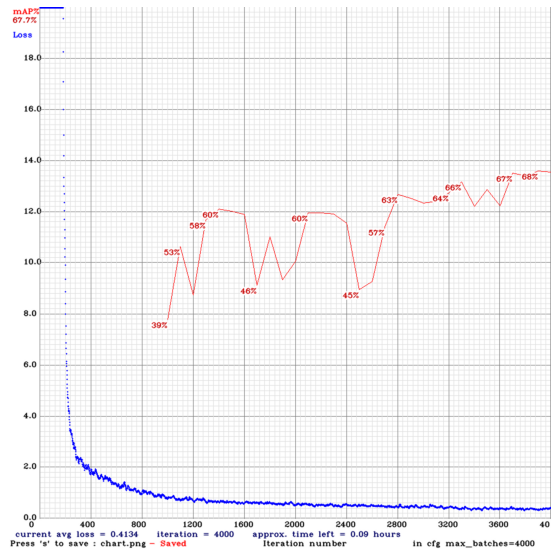

In [ ]:
imShow('chart.png')

# 8000 Iterations
 
 

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-spp_model6.cfg backup/yolov3-spp_model6_last.weights -dont_show -map

# Dataset 5 - 4000 Iterations


In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-spp_model6.cfg darknet53.conv.74 -dont_show -map

# Dataset5 - 8000 Iterations

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-spp_model6.cfg darknet53.conv.74 -dont_show -map

In [ ]:
!./darknet detector map data/obj.data cfg/yolov3-spp_model6.cfg backup/yolov3-spp_model6_best.weights


In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-spp_model6.cfg darknet53.conv.74 -dont_show -map

# Dataset7 - 4000 Iterations - 256x256

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-spp_model6.cfg darknet53.conv.74 -dont_show -map

In [ ]:
!./darknet detector train ata/obj.data cfg/yolov3-spp_model6.cfg darknet53.conv.74 -dont_show -map